In [1]:
import pandas as pd

# Load the dataset into a DataFrame
file_path = "/content/Variance-Analysis-Data.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows to verify
print(df.head())


  Category       Subcategory  Month  Budgeted ($)  Actual ($)  Variance ($)  \
0  Revenue               MRR  45658         75697       74994          -703   
1  Revenue           Upsells  45658         42606       49140          6534   
2  Revenue     One-time Fees  45658         50397       57387          6990   
3     COGS           Hosting  45658         11016       16885          5869   
4     COGS  Third-party APIs  45658         65591       71483          5892   

   Variance (%)                                         Commentary  
0     -0.928703  Lower than expected revenue due to higher chur...  
1     15.335868  Strong sales performance resulted in revenue e...  
2     13.869873  Strong sales performance resulted in revenue e...  
3     53.277052  Increased cloud hosting and third-party servic...  
4      8.982940  Increased cloud hosting and third-party servic...  


<ipython-input-2-df17b5a4b305>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_variance["Category"], rotation=30, ha="right")


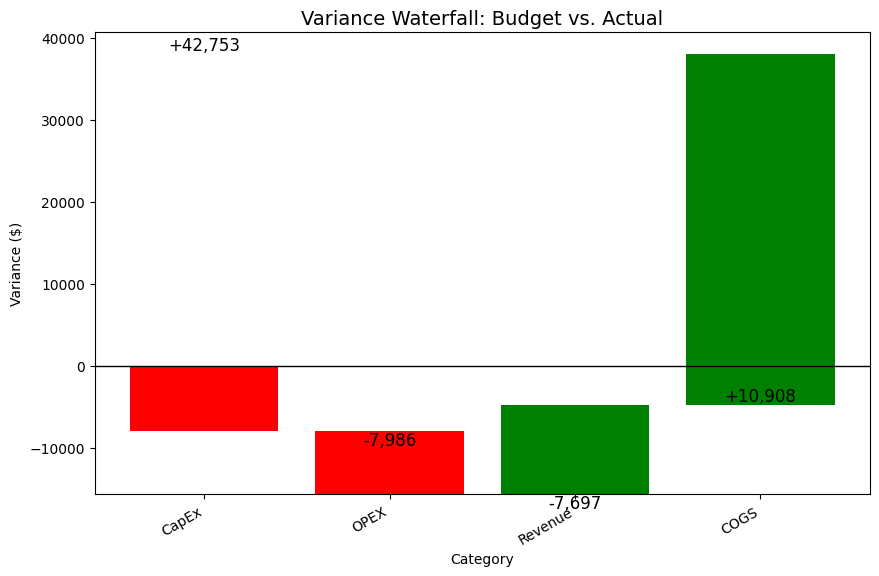

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter only relevant columns
df_variance = df.groupby("Category")["Variance ($)"].sum().reset_index()

# Sort categories by impact
df_variance = df_variance.sort_values(by="Variance ($)", ascending=True)

# Waterfall calculation
df_variance["Cumulative"] = df_variance["Variance ($)"].cumsum()
df_variance["Start"] = df_variance["Cumulative"] - df_variance["Variance ($)"]

# Define colors (positive vs negative impact)
colors = df_variance["Variance ($)"].apply(lambda x: "green" if x > 0 else "red")

# Plot waterfall chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_variance["Category"], df_variance["Variance ($)"], bottom=df_variance["Start"], color=colors)

# Add labels
for i, row in df_variance.iterrows():
    ax.text(i, row["Cumulative"], f'{row["Variance ($)"]:+,.0f}', ha="center", va="bottom" if row["Variance ($)"] > 0 else "top", fontsize=12)

# Formatting
ax.axhline(0, color="black", linewidth=1)
ax.set_title("Variance Waterfall: Budget vs. Actual", fontsize=14)
ax.set_ylabel("Variance ($)")
ax.set_xlabel("Category")
ax.set_xticklabels(df_variance["Category"], rotation=30, ha="right")

plt.show()


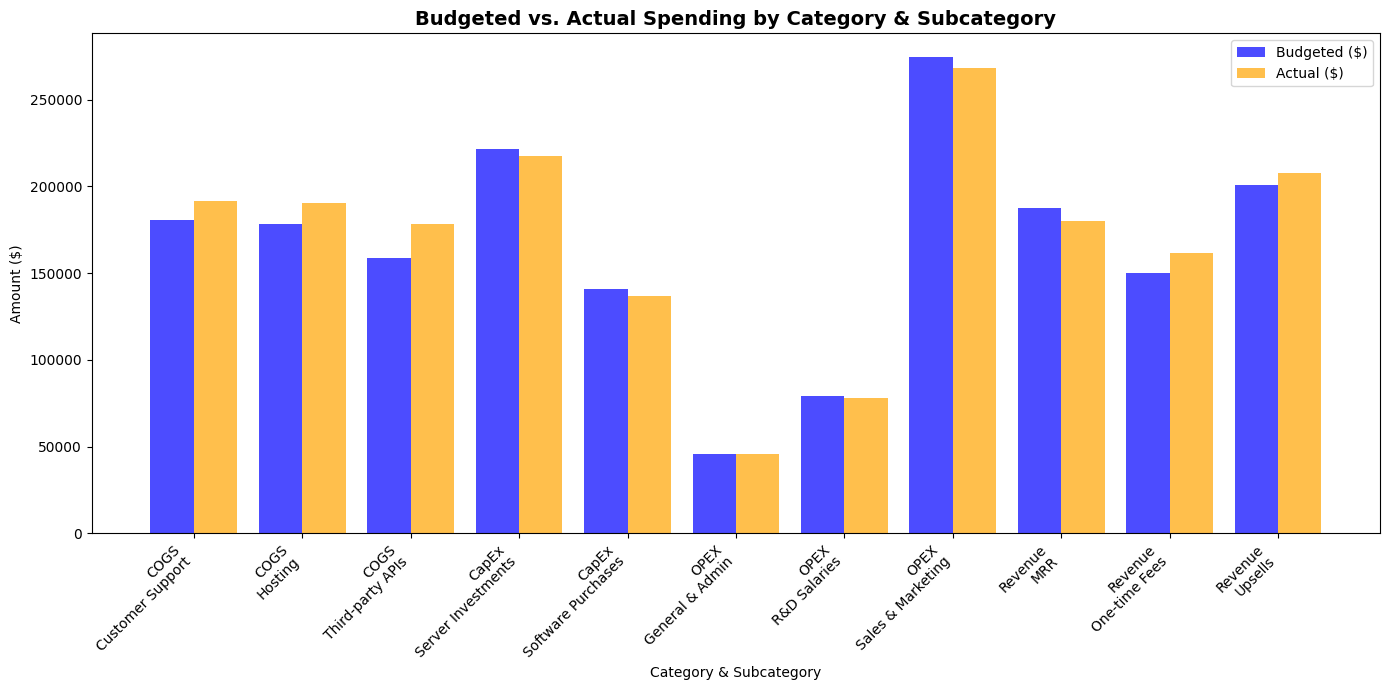

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Pivot data for plotting
df_pivot = df.pivot_table(index=["Category", "Subcategory"], values=["Budgeted ($)", "Actual ($)"], aggfunc="sum").reset_index()

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Bar width and positions
x = np.arange(len(df_pivot))  # X-axis positions
bar_width = 0.4

# Plot bars
ax.bar(x - bar_width / 2, df_pivot["Budgeted ($)"], width=bar_width, label="Budgeted ($)", color="blue", alpha=0.7)
ax.bar(x + bar_width / 2, df_pivot["Actual ($)"], width=bar_width, label="Actual ($)", color="orange", alpha=0.7)

# Formatting
ax.set_xticks(x)
ax.set_xticklabels([f"{cat}\n{sub}" for cat, sub in zip(df_pivot["Category"], df_pivot["Subcategory"])], rotation=45, ha="right")
ax.set_ylabel("Amount ($)")
ax.set_xlabel("Category & Subcategory")
ax.set_title("Budgeted vs. Actual Spending by Category & Subcategory", fontsize=14, fontweight="bold")
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


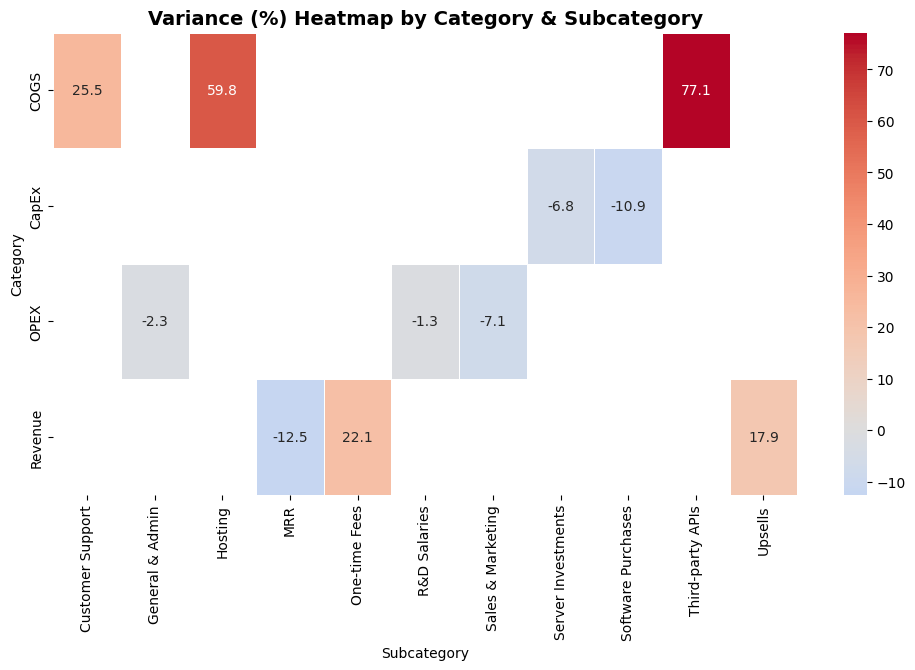

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot data to sum Variance (%) by Category and Subcategory
df_pivot = df.pivot_table(index="Category", columns="Subcategory", values="Variance (%)", aggfunc="sum")

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5, center=0)

# Formatting
plt.title("Variance (%) Heatmap by Category & Subcategory", fontsize=14, fontweight="bold")
plt.ylabel("Category")
plt.xlabel("Subcategory")

# Show the plot
plt.show()


<ipython-input-6-bce3e7a29668>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Actual ($)", palette="Set2")


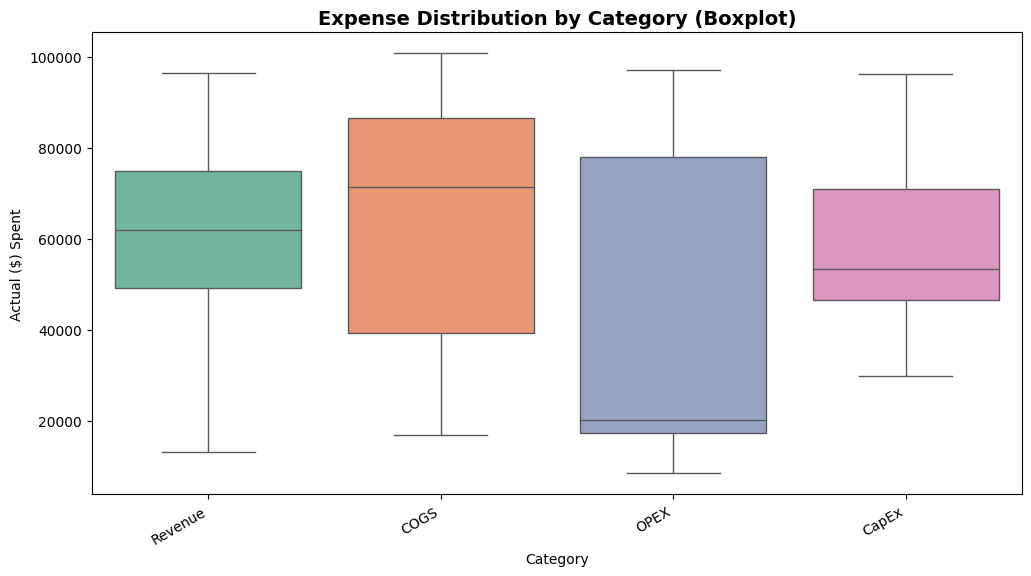

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize expense distribution across categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Category", y="Actual ($)", palette="Set2")

# Formatting
plt.title("Expense Distribution by Category (Boxplot)", fontsize=14, fontweight="bold")
plt.ylabel("Actual ($) Spent")
plt.xlabel("Category")
plt.xticks(rotation=30, ha="right")

# Show the plot
plt.show()


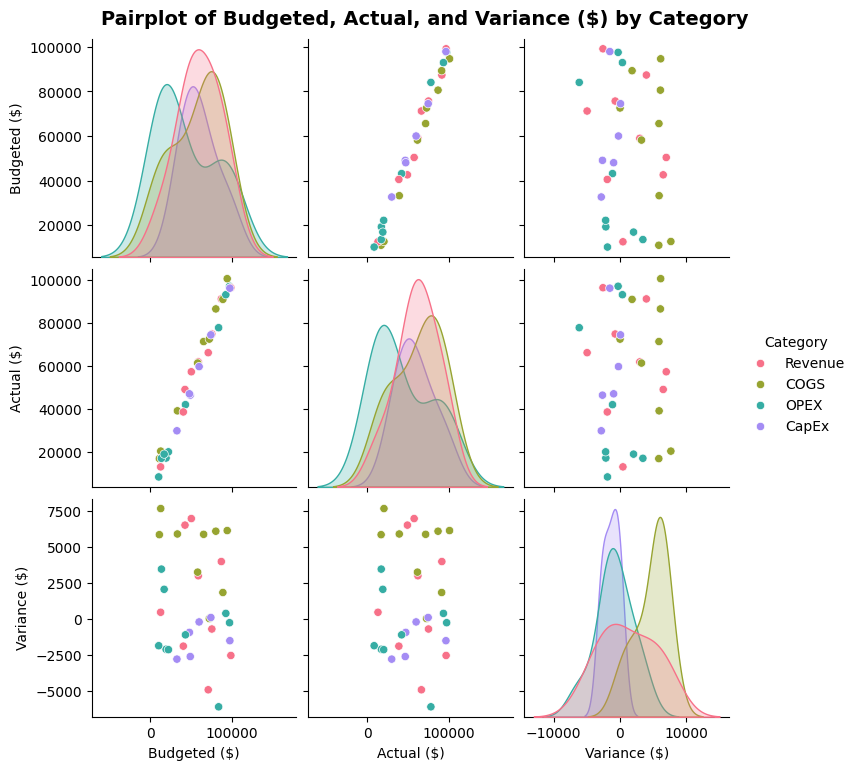

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Pairplot to visualize correlations between financial metrics
sns.pairplot(df, hue="Category", vars=["Budgeted ($)", "Actual ($)", "Variance ($)"], palette="husl")

# Formatting
plt.suptitle("Pairplot of Budgeted, Actual, and Variance ($) by Category", fontsize=14, fontweight="bold", y=1.02)

# Show the plot
plt.show()


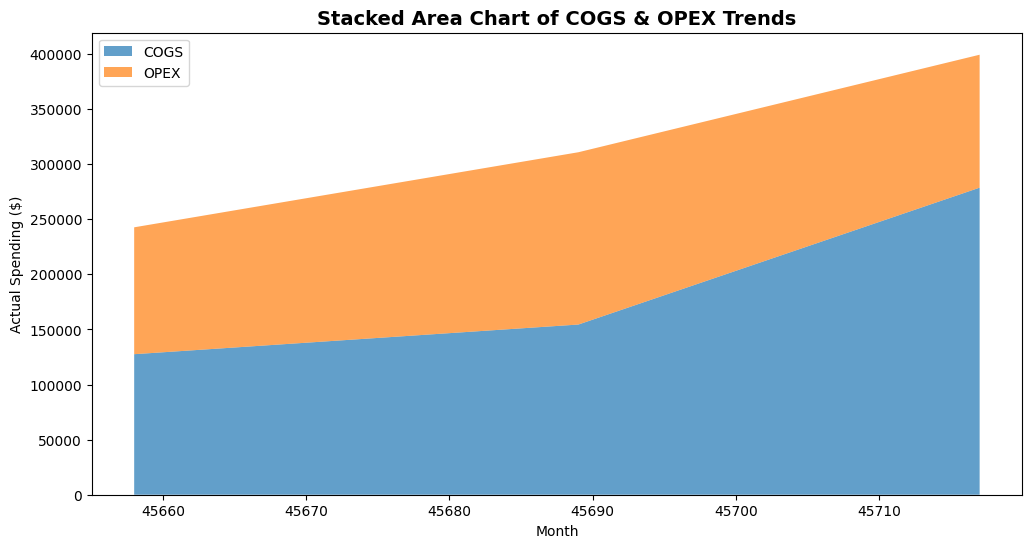

In [8]:
import matplotlib.pyplot as plt

# Filter and pivot data for COGS & OPEX trends
df_filtered = df[df["Category"].isin(["COGS", "OPEX"])].pivot_table(index="Month", columns="Category", values="Actual ($)", aggfunc="sum")

# Plot
plt.figure(figsize=(12, 6))
plt.stackplot(df_filtered.index, df_filtered["COGS"], df_filtered["OPEX"], labels=["COGS", "OPEX"], alpha=0.7)

# Formatting
plt.title("Stacked Area Chart of COGS & OPEX Trends", fontsize=14, fontweight="bold")
plt.ylabel("Actual Spending ($)")
plt.xlabel("Month")
plt.legend()

# Show plot
plt.show()


<ipython-input-9-ae10173a100d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=palette_df, x="Category", y="Actual ($)", palette=palette, ax=ax)
<ipython-input-9-ae10173a100d>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(palette_df["Category"], rotation=30, ha="right")
<ipython-input-9-ae10173a100d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=palette_df, x="Category", y="Actual ($)", palette=palette, ax=ax)
<ipython-input-9-ae10173a100d>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator

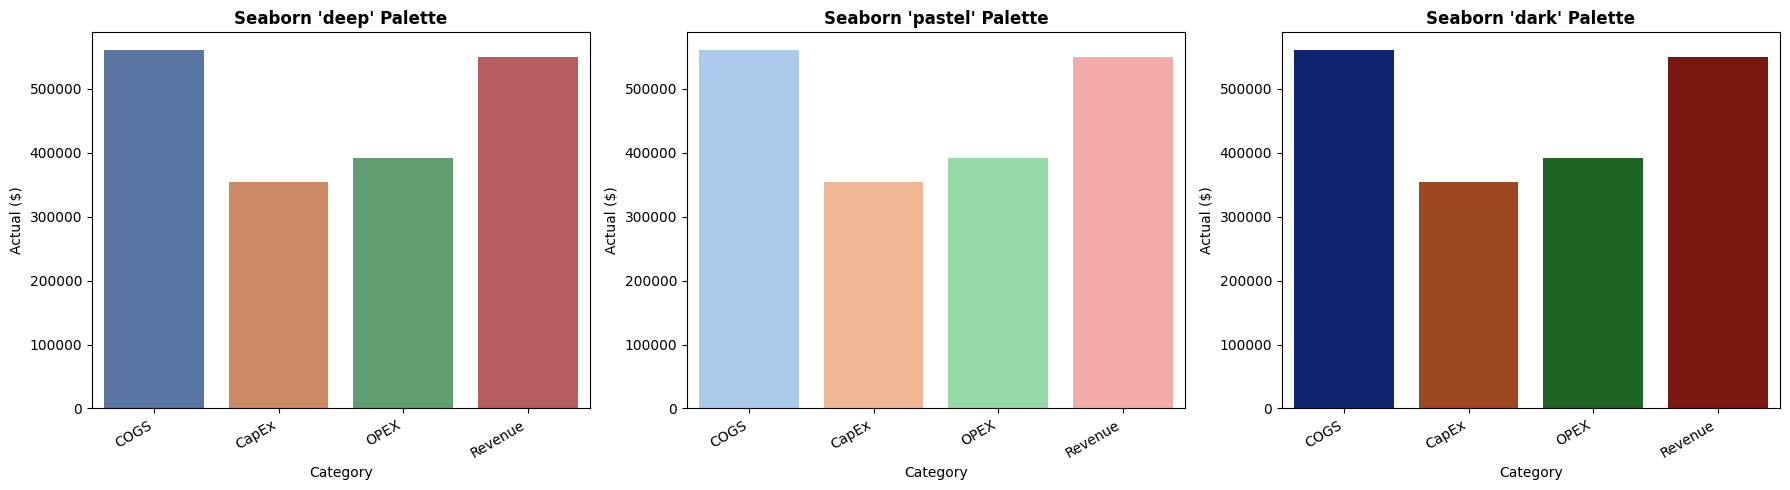

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a sample dataset for the palette showcase
palette_df = df[["Category", "Actual ($)"]].groupby("Category").sum().reset_index()

# Plot with multiple seaborn color palettes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Different palettes
palettes = ["deep", "pastel", "dark"]
titles = ["Seaborn 'deep' Palette", "Seaborn 'pastel' Palette", "Seaborn 'dark' Palette"]

for ax, palette, title in zip(axes, palettes, titles):
    sns.barplot(data=palette_df, x="Category", y="Actual ($)", palette=palette, ax=ax)
    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.set_xticklabels(palette_df["Category"], rotation=30, ha="right")

# Show plot
plt.tight_layout()
plt.show()


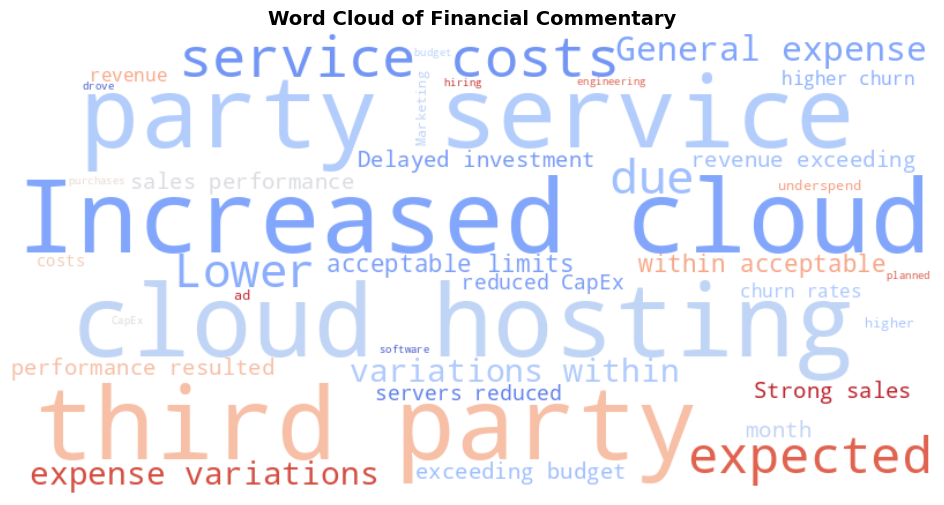

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all commentary text
text = " ".join(df["Commentary"].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm", max_words=100).generate(text)

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Financial Commentary", fontsize=14, fontweight="bold")

# Show plot
plt.show()


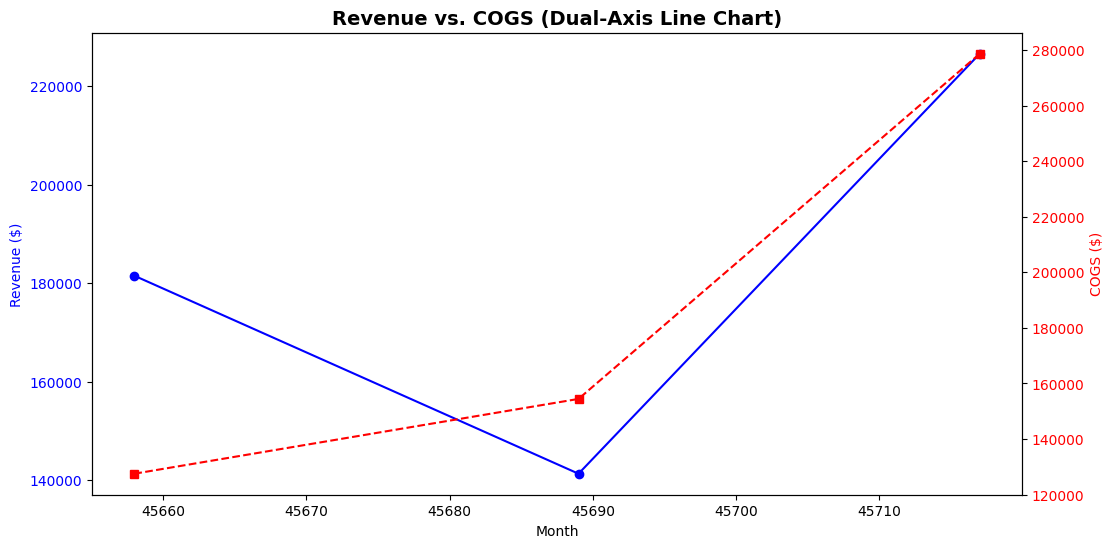

In [11]:
import matplotlib.pyplot as plt

# Filter for Revenue & COGS data
df_filtered = df[df["Category"].isin(["Revenue", "COGS"])].pivot_table(index="Month", columns="Category", values="Actual ($)", aggfunc="sum")

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Revenue on primary y-axis
ax1.plot(df_filtered.index, df_filtered["Revenue"], marker="o", linestyle="-", color="blue", label="Revenue")
ax1.set_ylabel("Revenue ($)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a secondary y-axis for COGS
ax2 = ax1.twinx()
ax2.plot(df_filtered.index, df_filtered["COGS"], marker="s", linestyle="--", color="red", label="COGS")
ax2.set_ylabel("COGS ($)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Formatting
ax1.set_title("Revenue vs. COGS (Dual-Axis Line Chart)", fontsize=14, fontweight="bold")
ax1.set_xlabel("Month")

# Show plot
plt.show()


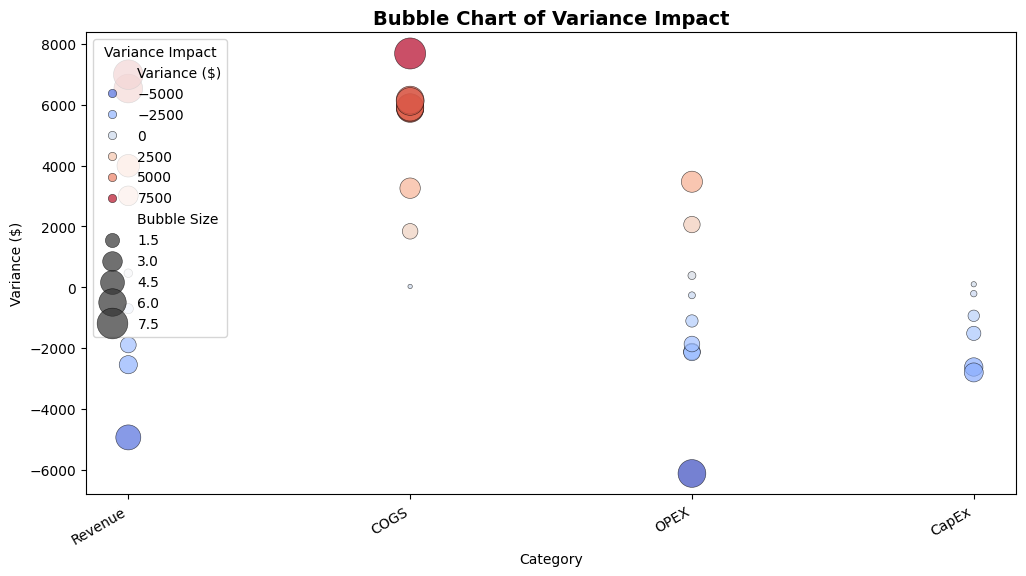

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bubble size based on absolute variance impact
df["Bubble Size"] = df["Variance ($)"].abs() / 1000

# Create bubble chart
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Category", y="Variance ($)", size="Bubble Size", hue="Variance ($)", palette="coolwarm", sizes=(10, 500), edgecolor="black", alpha=0.7)

# Formatting
plt.title("Bubble Chart of Variance Impact", fontsize=14, fontweight="bold")
plt.ylabel("Variance ($)")
plt.xlabel("Category")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Variance Impact", loc="upper left")

# Show plot
plt.show()
